# Arrest Data
### By- Shruti Mali

#### INTRODUCTION

- Dataset used: https://data.wprdc.org/dataset/arrest-data 
- This dataset includes the arrest data per neighborhood and from 1998 to 2023. The Bloomfield neighborhood crime analysis utilizes a comprehensive dataset from the Arrest Data Dictionary, which records information on incidents, arrests, and neighborhood characteristics. Key fields include demographic data such as age, gender, and race, alongside temporal and spatial details like arrest dates, times, and generalized incident locations. By focusing on the **NEIGHBORHOOD** field, this project examines crime trends in Bloomfield from 2019 to 2023, comparing its crime rates to citywide averages. With sensitive location data protected for privacy and other fields publicly accessible, this analysis aims to provide actionable insights into public safety, highlighting whether crime in Bloomfield is a livable neighborhood or not.

### Lets dive in....

![drumroll pls](https://media.giphy.com/media/116seTvbXx07F6/giphy.gif)

In [2]:
import pandas as pd
import numpy as np

# Loading the data
arrest_data_pandas = pd.read_csv("arrest.csv")

# Group by 'INCIDENTNEIGHBORHOOD' and count the number of incidents
neighborhood_crime_count = arrest_data_pandas.groupby('INCIDENTNEIGHBORHOOD').size()

# Sort the values in descending order (most incidents first)
neighborhood_counts_sorted = neighborhood_crime_count.sort_values(ascending=False)

# Convert the series to a DataFrame for easier handling
neighborhood_counts_df = pd.DataFrame(neighborhood_counts_sorted)

# Rename the column to 'Crime Incidents' for clarity
neighborhood_counts_df = neighborhood_counts_df.rename(columns={0: 'Crime Incidents'})

# Set the index name to 'Neighborhoods' (this will be the column that displays neighborhood names)
neighborhood_counts_df.index.name = 'Neighborhoods'

# Display the table (it will show up neatly)
print(neighborhood_counts_df)


                           Crime Incidents
Neighborhoods                             
Central Business District             4440
South Side Flats                      3497
Carrick                               2352
East Allegheny                        2217
Homewood South                        2090
...                                    ...
Ridgemont                               37
Central Northside                       23
Mt. Oliver Boro                         18
Troy Hill-Herrs Island                   6
Mt. Oliver Neighborhood                  2

[98 rows x 1 columns]


- Here we can see that the number of crimes vary from as high as 4440 to as low as 2. The .csv file consists data from 1998 to 2023. For this project the focus will be on Bloomfield neighborhood, and by the end, it will be proven that Bloomfield is a livable neighborhood. 

### **Let us get some stats!!**

In [3]:
total_crimes_all_neighborhoods = neighborhood_crime_count.sum()
print("The total arrests occured in the neighborhood of Pittsburgh from 1998 to 2023 are:", total_crimes_all_neighborhoods)

#-------------
neighborhood_to_display = 'Bloomfield'

# Display the total crimes for that neighborhood
bfield_crime_count = neighborhood_crime_count.get(neighborhood_to_display, 'Neighborhood not found')

# Print the result
print(f"Total arrests in {neighborhood_to_display}: {bfield_crime_count}")

The total arrests occured in the neighborhood of Pittsburgh from 1998 to 2023 are: 63994
Total arrests in Bloomfield: 984


#### which is about 

In [4]:
bfield_crimepercent = (bfield_crime_count/total_crimes_all_neighborhoods)*100
print(bfield_crimepercent, "%")

1.5376441541394505 %


In [5]:
# Calculate the median of the total crimes in all neighborhoods
median_crimes = neighborhood_crime_count.median()

# Print the result
print(f"Median of total arrests in all neighborhoods: {median_crimes}")

Median of total arrests in all neighborhoods: 400.5


In [6]:
average_incidents_per_neighborhood = neighborhood_crime_count.mean()

# Display the average
print(f"Average Number of Incidents per Neighborhood: {average_incidents_per_neighborhood}")

Average Number of Incidents per Neighborhood: 653.0


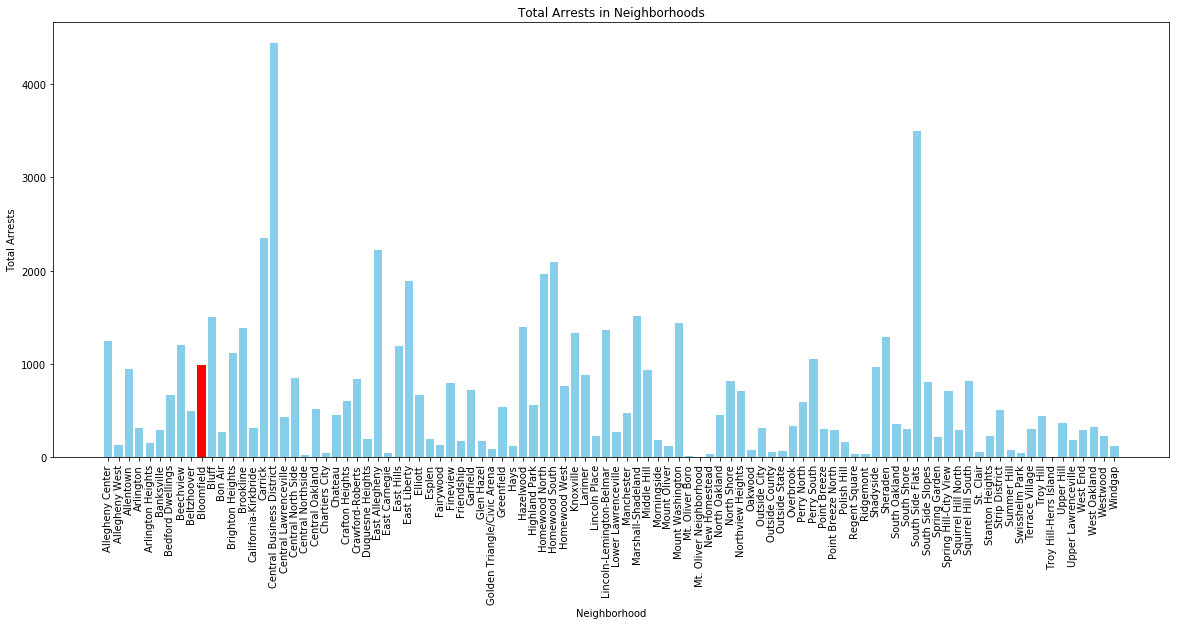

In [8]:
import matplotlib.pyplot as plt

# Define which neighborhood to highlight
neighborhood_to_highlight = 'Bloomfield'

# Create a list of colors: Highlight the chosen neighborhood with a different color
colors = ['red' if neighborhood == neighborhood_to_highlight else 'skyblue' 
          for neighborhood in neighborhood_crime_count.index]

# Create a larger bar graph
plt.figure(figsize=(20, 8))

# Plot the bars with custom colors
plt.bar(neighborhood_crime_count.index, neighborhood_crime_count, color=colors)

# Add labels and title
plt.xlabel('Neighborhood')
plt.ylabel('Total Arrests')
plt.title('Total Arrests in Neighborhoods')

# Rotate X-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

The highlighted red bar represents the data of neighborhood - Bloomfield

Combining all of the information.......

In [9]:
data = {
    'Stats': ['Total Arrests', 'Mean', 'Median', 'Arrests in Bloomfield'],
    'Values': [total_crimes_all_neighborhoods, average_incidents_per_neighborhood, median_crimes, bfield_crime_count]
}

bfield_df = pd.DataFrame(data)
bfield_df.set_index('Stats', inplace=True)
bfield_df

,Values
Stats,
Total Arrests,63994.0
Mean,653.0
Median,400.5
Arrests in Bloomfield,984.0


![uh oh](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExajBneGdnd3c2cnM5YXN4OWdzaGExbzFmYnc5OG9jZWhuYjN2aG15NSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/vSSdLSLbGIXio/giphy.gif)

According to these statistics, any one will come to a conclusion that Bloomfield is not a safe place to live. Some outlier neighborhoods (lies an abnormal distance from other values in a random sample from a population) can cause the mean and median to change drastically. Soooooo, lets dig in further. 

The data used for the calculations dates back to 1998. Since the current year is 2024, it will be better to focus on the recent years. The new focus would be the years 2019-2023. 

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


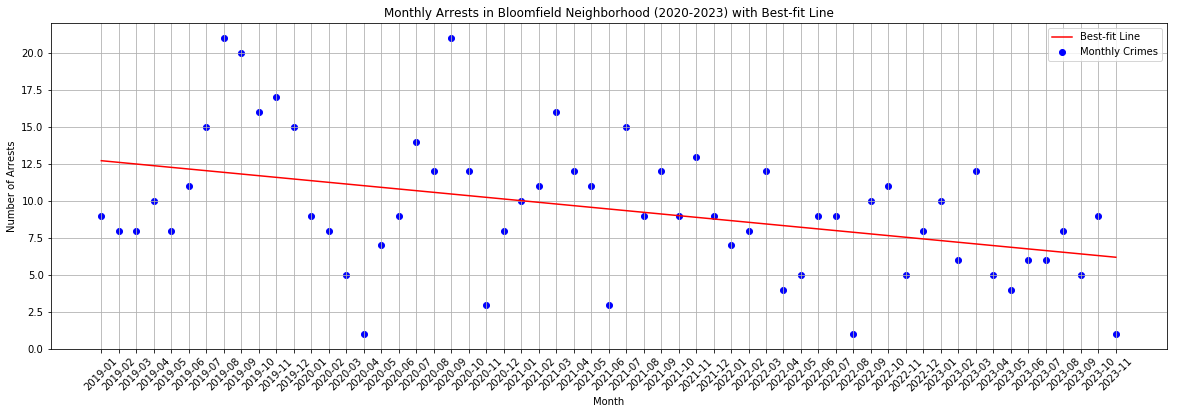

Slope of the best-fit line: -0.11239041496201065


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your dataframe is 'df' and it has 'incidentneighborhood' and 'ARRESTTIME'

# Convert 'ARRESTTIME' to datetime (if not already)
arrest_data_pandas['ARRESTTIME'] = pd.to_datetime(arrest_data_pandas['ARRESTTIME'], errors='coerce')

# Step 1: Filter the data for 'Bloomfield' neighborhood and date range from 2019 to 2023
bfield_data_filtered = arrest_data_pandas[
    (arrest_data_pandas['INCIDENTNEIGHBORHOOD'] == 'Bloomfield') & 
    (arrest_data_pandas['ARRESTTIME'] >= '2019-01-01') & 
    (arrest_data_pandas['ARRESTTIME'] <= '2023-12-31')
]

# Step 2: Extract Year-Month from 'ARRESTTIME'
bfield_data_filtered['Year-Month'] = bfield_data_filtered['ARRESTTIME'].dt.to_period('M')

# Step 3: Group by Year-Month and count the number of crimes
monthly_crimes = bfield_data_filtered.groupby('Year-Month').size()

# Step 4: Create a scatter plot
plt.figure(figsize=(20, 6))
plt.scatter(monthly_crimes.index.astype(str), monthly_crimes, color='blue', label='Monthly Crimes')

# Step 5: Fit a best-fit line (linear regression)
months_int = np.arange(len(monthly_crimes))
coeffs = np.polyfit(months_int, monthly_crimes, 1)  # Linear fit (degree 1)

# The slope of the best-fit line
slope = coeffs[0]
intercept = coeffs[1]

best_fit_line = np.polyval(coeffs, months_int)

# Plot the best-fit line
plt.plot(monthly_crimes.index.astype(str), best_fit_line, color='red', label='Best-fit Line')

# Adding labels, title, and grid
plt.title('Monthly Arrests in Bloomfield Neighborhood (2020-2023) with Best-fit Line')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print the slope
print(f"Slope of the best-fit line: {slope}")

## **woohoo! good news!**

![uh oh](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExdzFtNGgzenM1cnZ0ZjI0dXNxbnVycDI1ZzlicTIwbHdweTBka3VoOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lck9f0L8jPjRtkigYy/giphy.gif
)

From the data represented in the scatter plot graph along with the best-fit line, it is clearly visible that the number of crimes are **reducing** over time. To back up this point, the slope of the best-fit line proves it; a **negative slope** represents **decrease**.

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


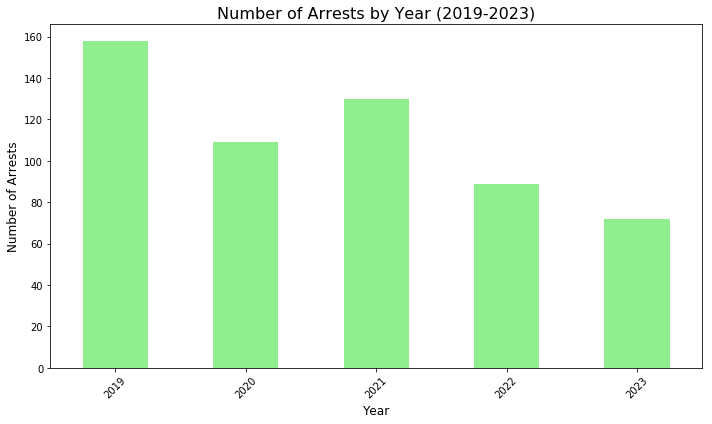

Year
2019    158
2020    109
2021    130
2022     89
2023     72
dtype: int64


In [11]:
# Extract the year from the ARRESTTIME column
arrest_data_pandas['Year'] = arrest_data_pandas['ARRESTTIME'].dt.year

# Extract Year from 'ARRESTTIME'
bfield_data_filtered['Year'] = bfield_data_filtered['ARRESTTIME'].dt.year

# Group by Year and count the number of crimes
yearly_crimes = bfield_data_filtered.groupby('Year').size()

# Plot the bar graph
plt.figure(figsize=(10,6))
yearly_crimes.plot(kind='bar', color='lightgreen')

# Set labels and title
plt.title('Number of Arrests by Year (2019-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)

# Show the bar graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display the table with the number of crimes per year
print(yearly_crimes)

The arrests in Bloomfield neighborhood have been decreasing, which is making this neighborhood more liveable.

#### CONCLUSION

In conclusion, the analysis of crime data in the Bloomfield neighborhood reveals a positive trend toward improved safety. Despite crime rates in Bloomfield being higher than the citywide mean and median, the scatterplot and the corresponding best-fit line indicate a clear decline in criminal incidents over the analyzed period from 2019 to 2023. This downward trajectory highlights a consistent reduction in crime rates, suggesting the effectiveness of community efforts or law enforcement initiatives. These findings provide evidence that, while challenges remain, Bloomfield is becoming a safer place over time.